# Heart Disease prediction

### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.optim as optim

### 2. Importing data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3. Data preprocessing

In [3]:
df = df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Constrictive Pericarditis (CP)',
    'trestbps': 'Resting BP',
    'chol': 'Cholestrol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG',
    'thalac': 'Maximum Heart Rate',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'Oldpeak',
    'slope': 'Slope',
    'ca': 'Coronary Artery Calcium',
    'thal': 'Thalassemia',
    'target': 'Target',
})

df.head()

,Age,Sex,Constrictive Pericarditis (CP),Resting BP,Cholestrol,Fasting Blood Sugar,Resting ECG,thalach,Exercise Induced Angina,Oldpeak,Slope,Coronary Artery Calcium,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

Age                                 int64
Sex                                 int64
Constrictive Pericarditis (CP)      int64
Resting BP                          int64
Cholestrol                          int64
Fasting Blood Sugar                 int64
Resting ECG                         int64
thalach                             int64
Exercise Induced Angina             int64
Oldpeak                           float64
Slope                               int64
Coronary Artery Calcium             int64
Thalassemia                         int64
Target                              int64
dtype: object

### 4. Exploratory Data Analysis

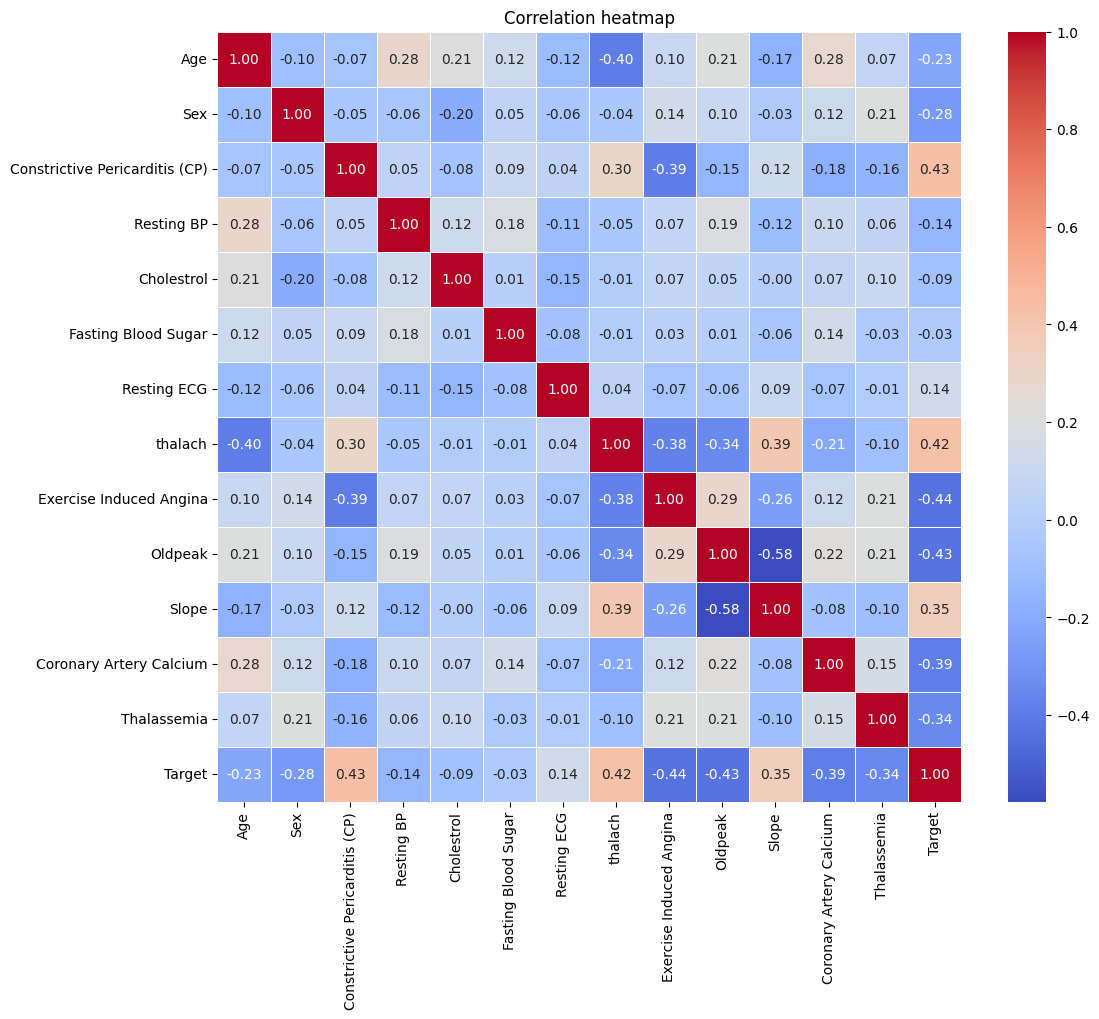

In [5]:
#Heatmap
#This plot shows the correlation of each attribute of the data


corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation heatmap")
plt.show()

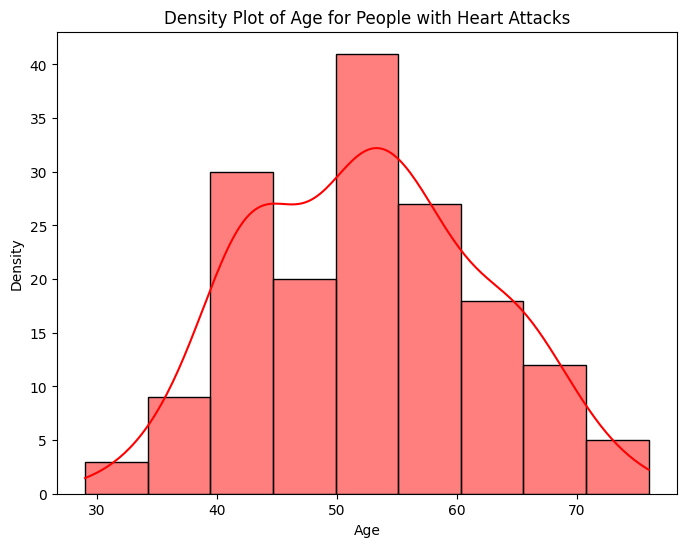

In [6]:
#Density plot
#This plot shows the age group of people who have the maximum number of heart attacks


#Filter the dataset to include only instances where the target variable indicates the presence of a heart attack
df_heart_attack = df[df['Target'] == 1]

plt.figure(figsize=(8, 6))
sns.histplot(data=df_heart_attack, x='Age', kde=True, color='red')
plt.title('Density Plot of Age for People with Heart Attacks')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


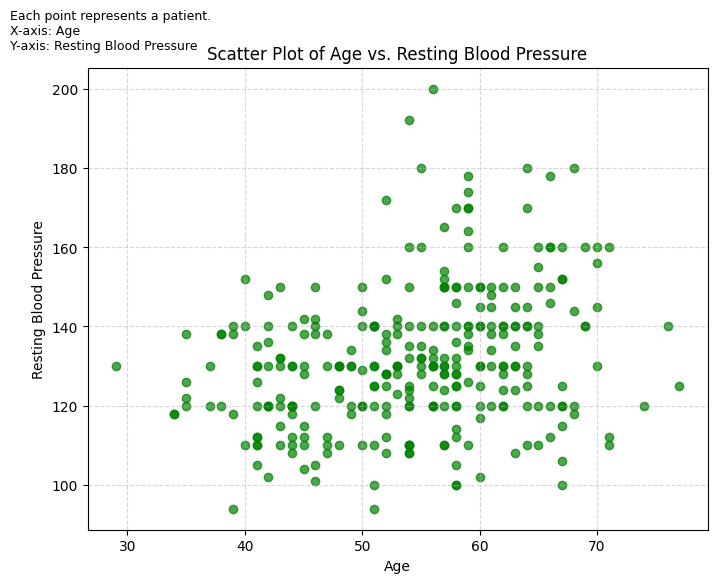

In [7]:
#Scatter plot
#This shows the graph for age vs. resting blood pressure


plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Resting BP'], alpha=0.7, color='green')
plt.title('Scatter Plot of Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.text(20, 210, 'Each point represents a patient.\nX-axis: Age\nY-axis: Resting Blood Pressure', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Figure size 1200x1000 with 0 Axes>

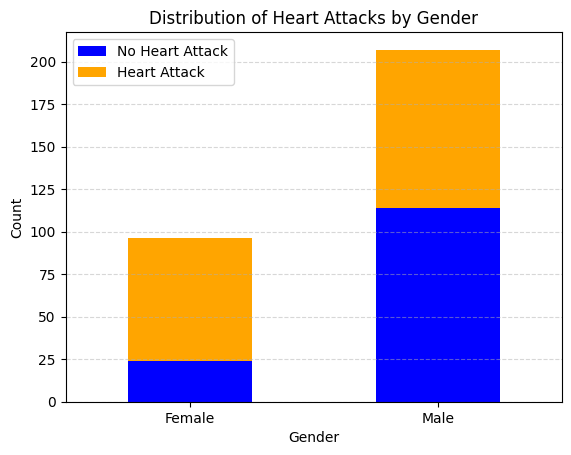

In [8]:
#Stacked Bar Chart
#This shows the number of heart attacks in males and females

#Group data by 'Sex' and 'Target'
gender_heart_attacks = df.groupby(['Sex', 'Target']).size().unstack()

plt.figure(figsize=(12, 10))
gender_heart_attacks.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Distribution of Heart Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(['No Heart Attack', 'Heart Attack'], loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### 5. Machine Learning

In [9]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Logistic Regression

In [10]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
logreg_pred = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.8524590163934426


#### K-Nearest Neighbors (KNN)

In [12]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [13]:
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9016393442622951


#### Support Vector Machines (SVM)

In [14]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8688524590163934


#### Random Forest

In [16]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [17]:
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8360655737704918


### 6. Deep Learning

In [18]:
# Convert data to PyTorch tensors
X = df.drop('Target', axis=1).values.astype(np.float32)  # Features
y = df['Target'].values.astype(np.float32)  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).unsqueeze(1)  # Add extra dimension for compatibility
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test).unsqueeze(1)  # Add extra dimension for compatibility

# Define a simple ANN model
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate the model
input_size = X_train.shape[1]
model = ANN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
batch_size = 64

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Calculate accuracy after each epoch
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
        accuracy = (predicted == y_test_tensor).float().mean()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')
print(f'Model Accuracy: {accuracy.item():.4f}')


Epoch [1/10], Loss: 0.6715, Accuracy: 0.5902
Epoch [2/10], Loss: 0.6492, Accuracy: 0.7541
Epoch [3/10], Loss: 0.6277, Accuracy: 0.8197
Epoch [4/10], Loss: 0.6052, Accuracy: 0.8525
Epoch [5/10], Loss: 0.5809, Accuracy: 0.8852
Epoch [6/10], Loss: 0.5551, Accuracy: 0.9016
Epoch [7/10], Loss: 0.5275, Accuracy: 0.9016
Epoch [8/10], Loss: 0.4985, Accuracy: 0.8852
Epoch [9/10], Loss: 0.4695, Accuracy: 0.8852
Epoch [10/10], Loss: 0.4412, Accuracy: 0.9016
Model Accuracy: 0.9016
